## 『本次練習內容』
#### 運用這幾天所學觀念搭建一個CNN分類器

## 『本次練習目的』
  #### 熟悉CNN分類器搭建步驟與原理
  #### 學員們可以嘗試不同搭法，如使用不同的Maxpooling層，用GlobalAveragePooling取代Flatten等等

In [173]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.utils import to_categorical
from keras.models import load_model
from keras.datasets import cifar10
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from keras.applications.imagenet_utils import decode_predictions


In [169]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

def show_images(imgs, ncol=5, figsize=(15,6), labels=None):
    nrow = (len(imgs)//5)
    if len(imgs)%5 != 0 :
        nrow = nrow+1
        
    fig =  plt.figure(figsize=figsize)
    for i, img in enumerate(imgs):
        ax = fig.add_subplot(nrow, ncol, i+1)
        ax.imshow(img)
        if labels:
            ax.set_title(labels[i])
        

In [164]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape) #(50000, 32, 32, 3)

(50000, 32, 32, 3)


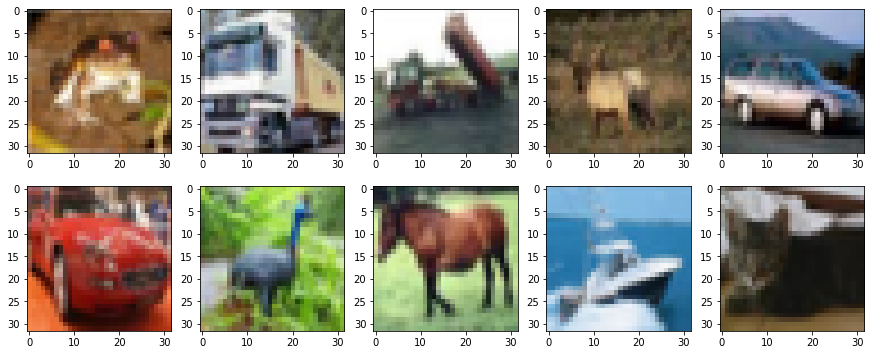

In [150]:
show_images(x_train[0:10])

In [165]:
## Normalize Data
def normalize(X_train,X_test):
        mean = np.mean(X_train,axis=(0,1,2,3))
        std = np.std(X_train, axis=(0, 1, 2, 3))
        X_train = (X_train-mean)/(std+1e-7)
        X_test = (X_test-mean)/(std+1e-7) 
        return X_train, X_test,mean,std
    
    
## Normalize Training and Testset    
x_train, x_test,mean_train,std_train = normalize(x_train, x_test) 
print("mean={}, std={}".format(mean_train,std_train))

mean=120.70756512369792, std=64.1500758911213


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

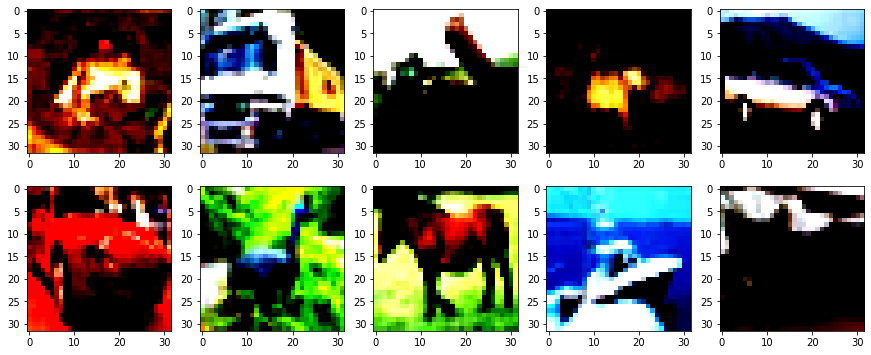

In [152]:
show_images(x_train[0:10])

In [158]:
## OneHot Label 由(None, 1)-(None, 10)
## ex. label=2,變成[0,0,1,0,0,0,0,0,0,0]
# one_hot=OneHotEncoder()
# y_train=one_hot.fit_transform(y_train).toarray()
# y_test=one_hot.transform(y_test).toarray()

/home/cicicici_hsiao/anaconda3/envs/cv100/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [166]:
## OneHot Label 
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_train, 10)

In [167]:

input_shape= x_train[0].shape
classifier=Sequential()

#卷積組合
classifier.add(Convolution2D(filters=32, kernel_size=(3,3), padding="same", activation='relu', input_shape=input_shape))#32,3,3,input_shape=(32,32,3),activation='relu''
classifier.add(BatchNormalization())

'''自己決定MaxPooling2D放在哪裡'''
classifier.add(MaxPooling2D(pool_size=(2,2)))

#卷積組合
classifier.add(Convolution2D(filters=64, kernel_size=(3,3), padding="same", activation='relu'))
classifier.add(BatchNormalization())

#flatten
classifier.add(Flatten())

#FC
classifier.add(Dense(units=100, activation="relu")) #output_dim=100,activation=relu

#輸出
classifier.add(Dense(units=10,activation="softmax"))

classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_14 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_15 (Batc (None, 16, 16, 64)        256       
_________________________________________________________________
flatten_7 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 100)               1638500   
__________

In [168]:
#超過兩個就要選categorical_crossentrophy
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
classifier.fit(x_train,y_train,batch_size=100,epochs=25)

Epoch 1/25
50000/50000 [==============================] - 9s 186us/step - loss: 1.3215 - acc: 0.5451
Epoch 2/25
50000/50000 [==============================] - 8s 170us/step - loss: 0.8483 - acc: 0.7017
Epoch 3/25
50000/50000 [==============================] - 9s 189us/step - loss: 0.6154 - acc: 0.7844
Epoch 4/25
50000/50000 [==============================] - 9s 187us/step - loss: 0.4358 - acc: 0.8497
Epoch 5/25
50000/50000 [==============================] - 9s 183us/step - loss: 0.2900 - acc: 0.8999
Epoch 6/25
50000/50000 [==============================] - 9s 171us/step - loss: 0.1975 - acc: 0.9325
Epoch 7/25
50000/50000 [==============================] - 9s 172us/step - loss: 0.1488 - acc: 0.9489
Epoch 8/25
50000/50000 [==============================] - 8s 166us/step - loss: 0.1191 - acc: 0.9595
Epoch 9/25
50000/50000 [==============================] - 8s 167us/step - loss: 0.1108 - acc: 0.9626
Epoch 10/25
50000/50000 [==============================] - 8s 166us/step - loss: 0.1036 - a

In [170]:
# save model
classifier.save("Day015.h5")

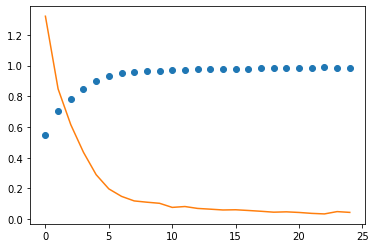

In [171]:
his = classifier.history
plt.figure()

plt.plot(his.history["acc"], "o" ,  label="acc")
plt.plot(his.history["loss"], label="loss")

## 預測新圖片，輸入影像前處理要與訓練時相同
#### ((X-mean)/(std+1e-7) ):這裡的mean跟std是訓練集的
## 維度如下方示範

In [174]:
model = load_model("Day015.h5")

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
list = np.random.randint(0,50000,10)
x_predict = x_train[list]
x_predict_norm = (x_predict-mean_train)/(std_train+1e-7) 
y_predict = model.predict(x_predict_norm)

# input_example=(np.zeros(shape=(1,32,32,3))-mean_train)/(std_train+1e-7) 
# classifier.predict(input_example)

In [175]:
import pandas as pd
df = pd.DataFrame(y_predict)
labels = df.idxmax(axis=1).tolist()

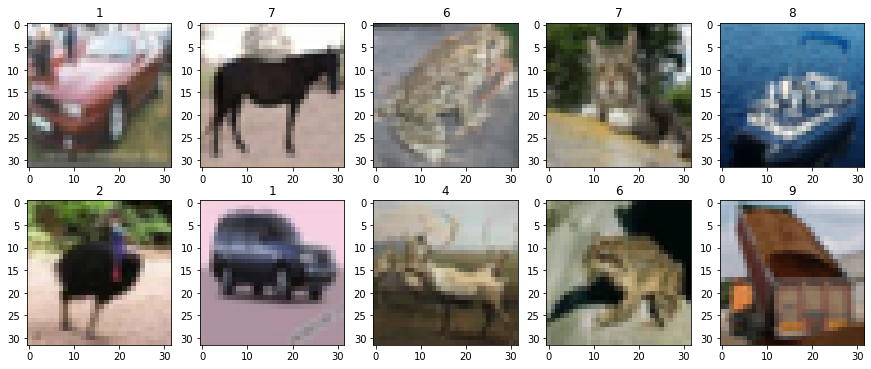

In [176]:
show_images(x_predict, labels=labels)